# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style='whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline

# sets the limit for the number of displayed columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# to scale the data
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to run k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to run hierachical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
data = pd.read_csv(r"C:\Users\Soneeka\Documents\Courses\GL - DSBA\6. Unsupervised Learning\Project 7\stock_data.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
# getting the number of rows and columns
data.shape

(340, 15)

In [4]:
# viewing a random sample of the dataset
data.sample(n=10,random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

In [5]:
# renaming Security column to Company
data.rename(columns={"Security":"Company"}, inplace=True)

In [6]:
# looking at column data types and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Company                       340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [7]:
# replacing space with underscore
data.columns = data.columns.str.replace(' ','_')
data.columns

Index(['Ticker_Symbol', 'Company', 'GICS_Sector', 'GICS_Sub_Industry',
       'Current_Price', 'Price_Change', 'Volatility', 'ROE', 'Cash_Ratio',
       'Net_Cash_Flow', 'Net_Income', 'Earnings_Per_Share',
       'Estimated_Shares_Outstanding', 'P/E_Ratio', 'P/B_Ratio'],
      dtype='object')

In [8]:
# changing object to category
cat_cols = data.select_dtypes(["object"]).columns

for col in cat_cols:
    data[col] = data[col].astype("category")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ticker_Symbol                 340 non-null    category
 1   Company                       340 non-null    category
 2   GICS_Sector                   340 non-null    category
 3   GICS_Sub_Industry             340 non-null    category
 4   Current_Price                 340 non-null    float64 
 5   Price_Change                  340 non-null    float64 
 6   Volatility                    340 non-null    float64 
 7   ROE                           340 non-null    int64   
 8   Cash_Ratio                    340 non-null    int64   
 9   Net_Cash_Flow                 340 non-null    int64   
 10  Net_Income                    340 non-null    int64   
 11  Earnings_Per_Share            340 non-null    float64 
 12  Estimated_Shares_Outstanding  340 non-null    floa

In [10]:
# getting the statistical summary
pd.set_option('display.float_format', lambda x: '%.1f' %x)
data.describe()

Current_Price  Price_Change  Volatility   ROE  Cash_Ratio  \
count          340.0         340.0       340.0 340.0       340.0   
mean            80.9           4.1         1.5  39.6        70.0   
std             98.1          12.0         0.6  96.5        90.4   
min              4.5         -47.1         0.7   1.0         0.0   
25%             38.6          -0.9         1.1   9.8        18.0   
50%             59.7           4.8         1.4  15.0        47.0   
75%             92.9          10.7         1.7  27.0        99.0   
max           1274.9          55.1         4.6 917.0       958.0   

       Net_Cash_Flow     Net_Income  Earnings_Per_Share  \
count          340.0          340.0               340.0   
mean      55537620.6   1494384602.9                 2.8   
std     1946365312.2   3940150279.3                 6.6   
min   -11208000000.0 -23528000000.0               -61.2   
25%     -193906500.0    352301250.0                 1.6   
50%        2098000.0    707336000.0                 2.9   
75%      169810750.0   1899000000.0                 4.6   
max    20764000000.0  24442000000.0                50.1   

       Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
count                         340.0      340.0      340.0  
mean                    577028337.8       32.6       -1.7  
std                     845849595.4       44.3       14.0  
min                      27672156.9        2.9      -76.1  
25%                     158848216.1       15.0       -4.4  
50%                     309675137.8       20.8       -1.1  
75%                     573117457.3       31.8        3.9  
max                    6159292035.0      528.0      129.1

In [11]:
# checking for duplicate values
data.duplicated().sum()

0

In [12]:
# checking for null values
data.isnull().sum()

Ticker_Symbol                   0
Company                         0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

In [13]:
# calculating market capitalisation
market_cap = ((data["Current_Price"])*(data["Estimated_Shares_Outstanding"]))
market_cap

0      28295301559.2
1      96739863582.6
2      67563581645.8
3      46936525555.4
4     124359003075.4
           ...      
335    31246348837.1
336    22863102630.4
337    19334268480.9
338     7040464992.1
339    23889528416.4
Length: 340, dtype: float64

In [14]:
# adding market cap column
data['Market_Cap'] = market_cap
data.head()

Ticker_Symbol                  Company             GICS_Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS_Sub_Industry  Current_Price  Price_Change  Volatility  ROE  \
0               Airlines           42.3          10.0         1.7  135   
1        Pharmaceuticals           59.2           8.3         2.2  130   
2  Health Care Equipment           44.9          11.3         1.3   21   
3   Application Software           93.9          14.0         1.4    9   
4         Semiconductors           55.3          -1.8         1.7   14   

   Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0          51     -604000000  7610000000                11.4   
1          77       51000000  5144000000                 3.1   
2          67      938000000  4423000000                 2.9   
3         180     -240840000   629551000                 1.3   
4         272      315120000   696878000                 0.3   

   Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio     Market_Cap  
0                   668129938.5        3.7       -8.8  28295301559.2  
1                  1633015873.0       18.8       -8.8  96739863582.6  
2                  1504421769.0       15.3       -0.4  67563581645.8  
3                   499643650.8       74.6        4.2  46936525555.4  
4                  2247993548.0      178.5        1.1 124359003075.4

In [15]:
data.describe()

Current_Price  Price_Change  Volatility   ROE  Cash_Ratio  \
count          340.0         340.0       340.0 340.0       340.0   
mean            80.9           4.1         1.5  39.6        70.0   
std             98.1          12.0         0.6  96.5        90.4   
min              4.5         -47.1         0.7   1.0         0.0   
25%             38.6          -0.9         1.1   9.8        18.0   
50%             59.7           4.8         1.4  15.0        47.0   
75%             92.9          10.7         1.7  27.0        99.0   
max           1274.9          55.1         4.6 917.0       958.0   

       Net_Cash_Flow     Net_Income  Earnings_Per_Share  \
count          340.0          340.0               340.0   
mean      55537620.6   1494384602.9                 2.8   
std     1946365312.2   3940150279.3                 6.6   
min   -11208000000.0 -23528000000.0               -61.2   
25%     -193906500.0    352301250.0                 1.6   
50%        2098000.0    707336000.0                 2.9   
75%      169810750.0   1899000000.0                 4.6   
max    20764000000.0  24442000000.0                50.1   

       Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio     Market_Cap  
count                         340.0      340.0      340.0          340.0  
mean                    577028337.8       32.6       -1.7  34643618601.9  
std                     845849595.4       44.3       14.0  49015921098.5  
min                      27672156.9        2.9      -76.1   2812600710.4  
25%                     158848216.1       15.0       -4.4   9394280549.6  
50%                     309675137.8       20.8       -1.1  17618364320.9  
75%                     573117457.3       31.8        3.9  36544964984.0  
max                    6159292035.0      528.0      129.1 326985052365.8

In [16]:
# copying original dataset
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Univariate Analysis**

In [17]:
# function to create histogram and boxplot
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize)
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="orange")
    
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color = "thistle") if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2,  color = "thistle")
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

In [18]:
# function to create a labeled barplot
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        
        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")
    plt.show()

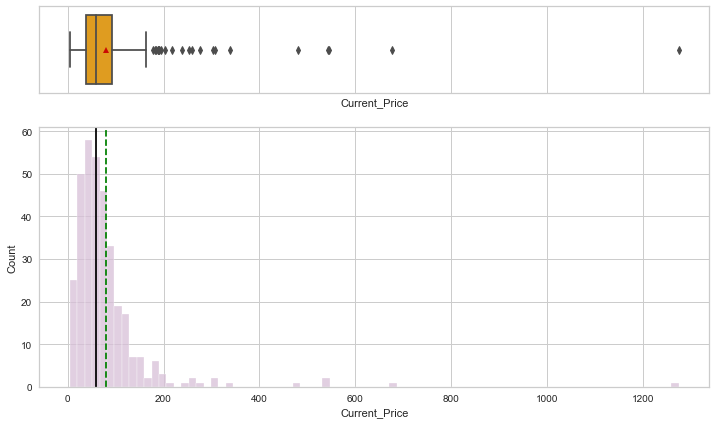

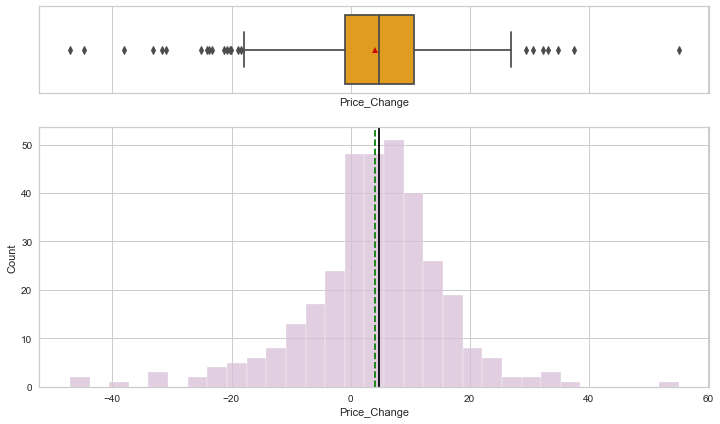

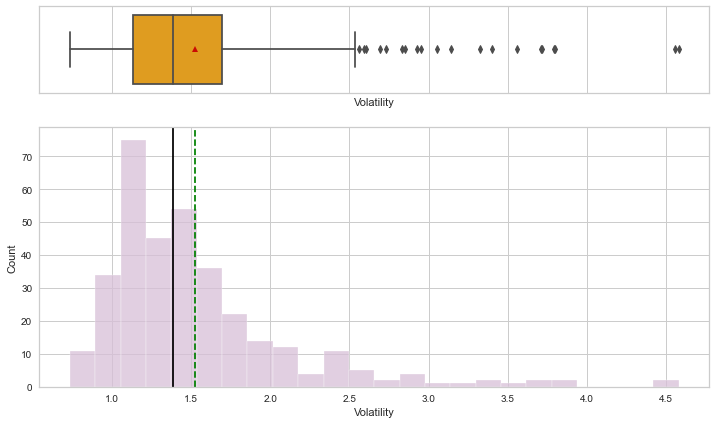

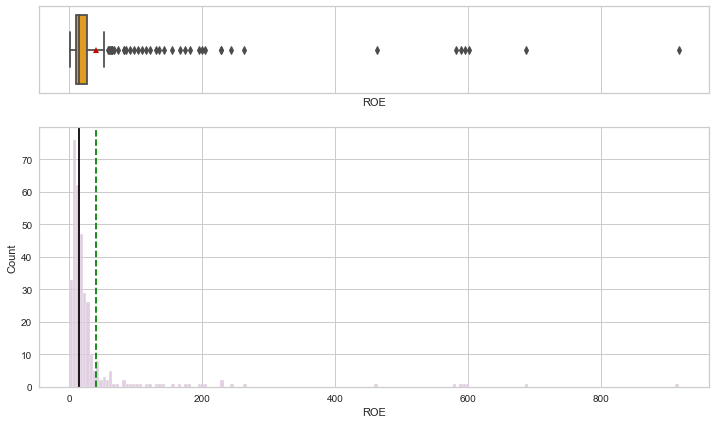

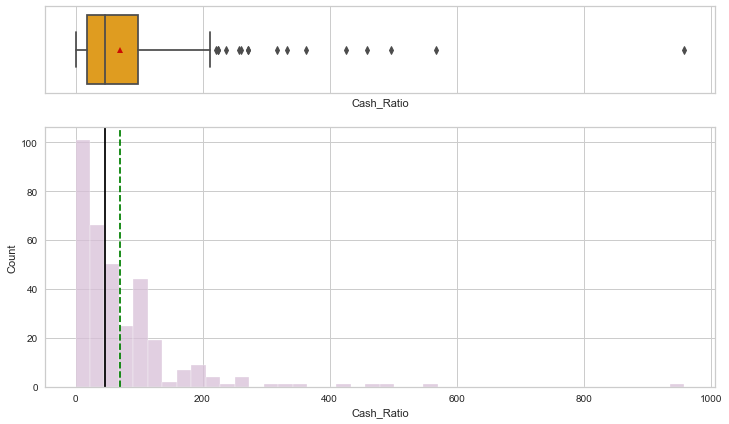

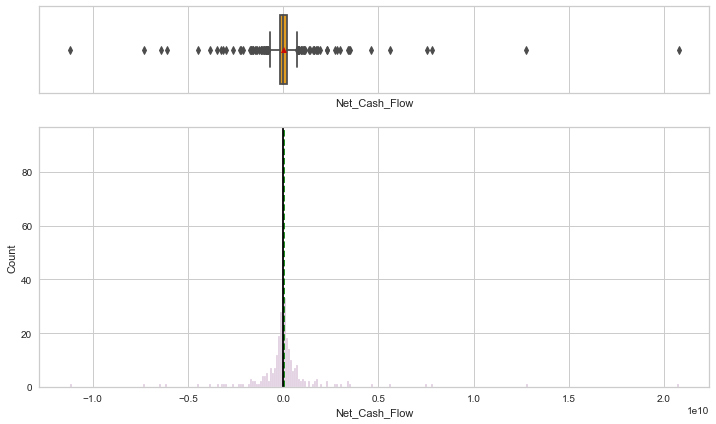

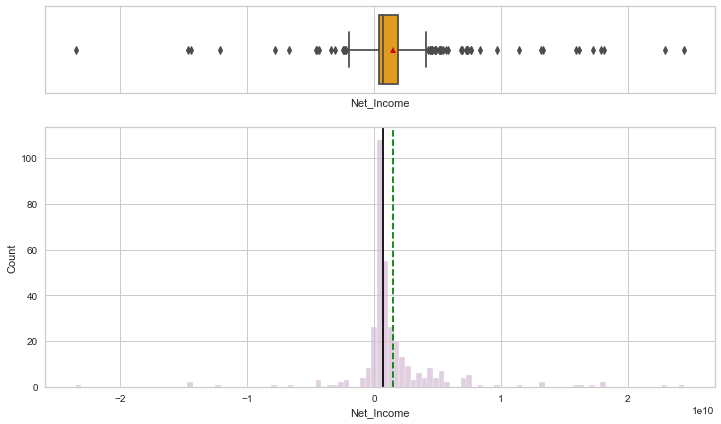

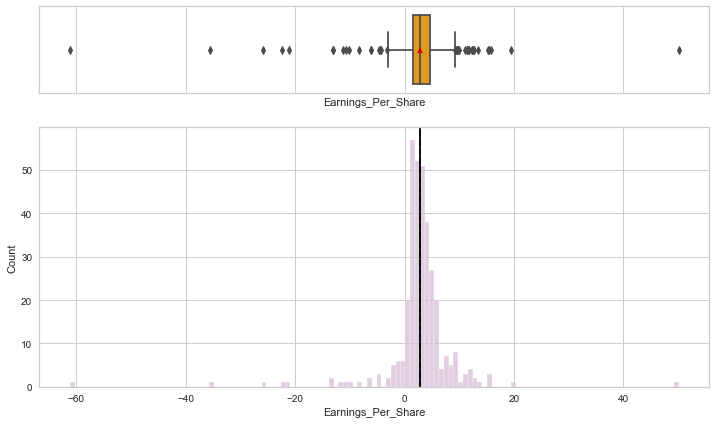

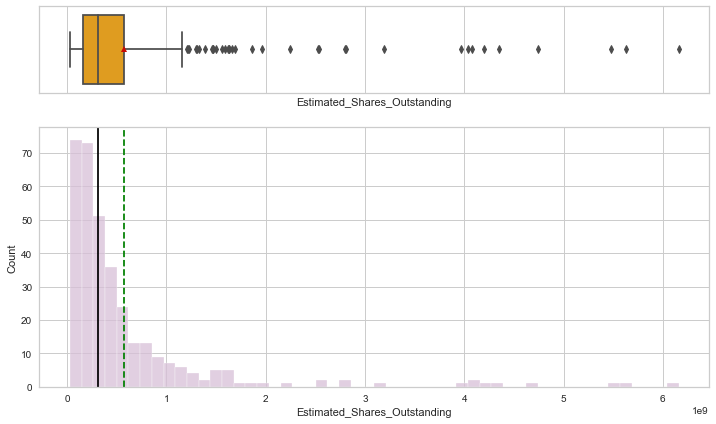

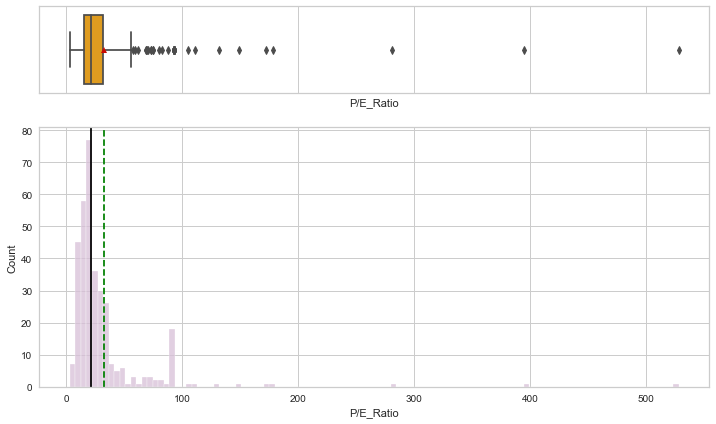

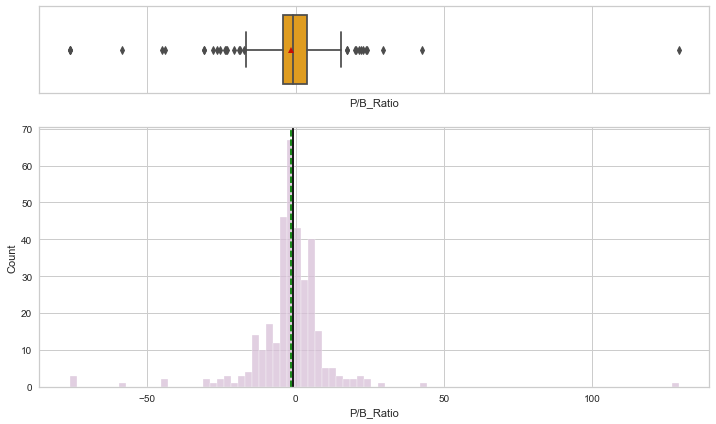

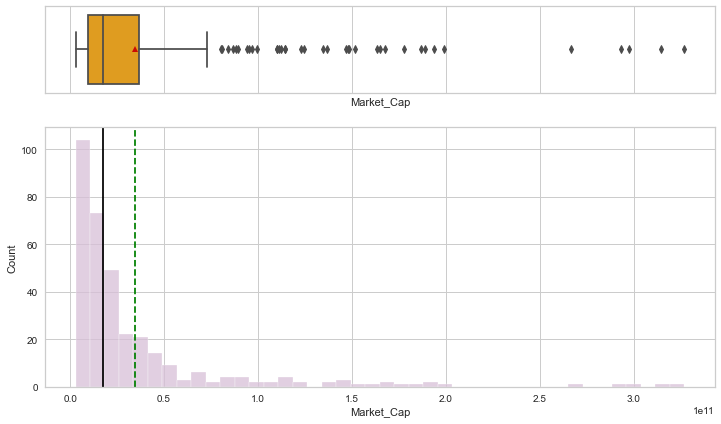

In [19]:
# plotting numerical data
num_cols = df.describe(include=["int64", "float64"])
for col in num_cols:
    histogram_boxplot(df, col)

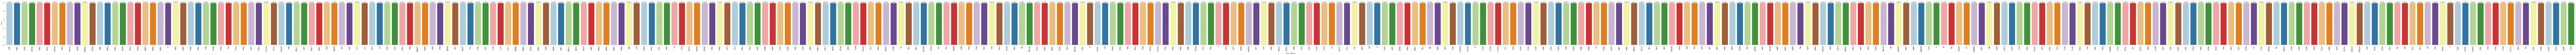

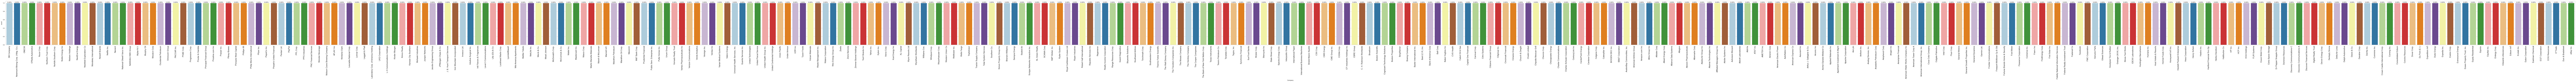

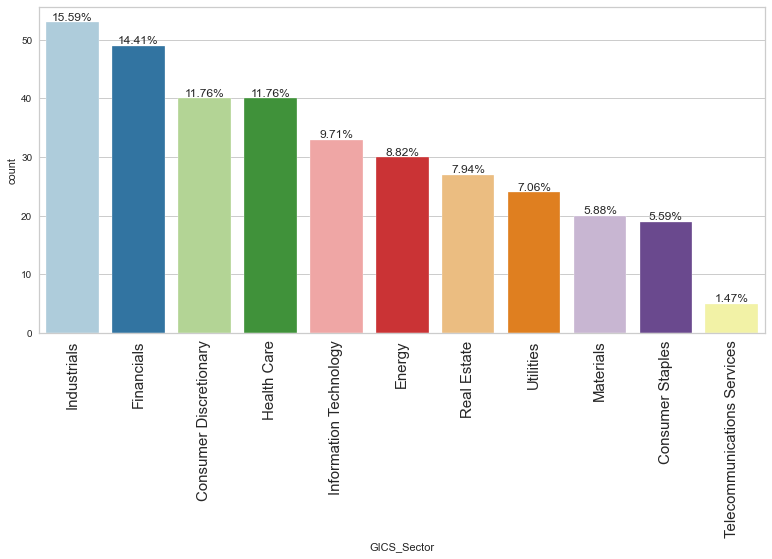

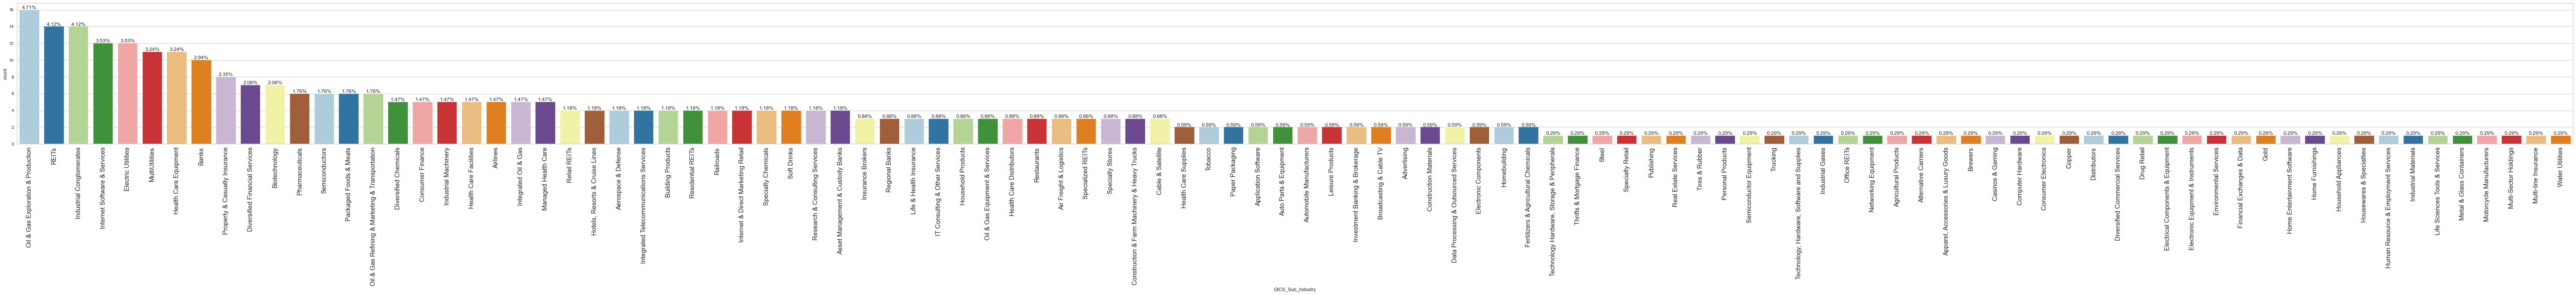

In [20]:
# plotting categorical data
cat_cols = df.describe(include=["category"]).columns
for col in cat_cols:
    labeled_barplot(df, col, perc=True)

**Bivariate Analysis**

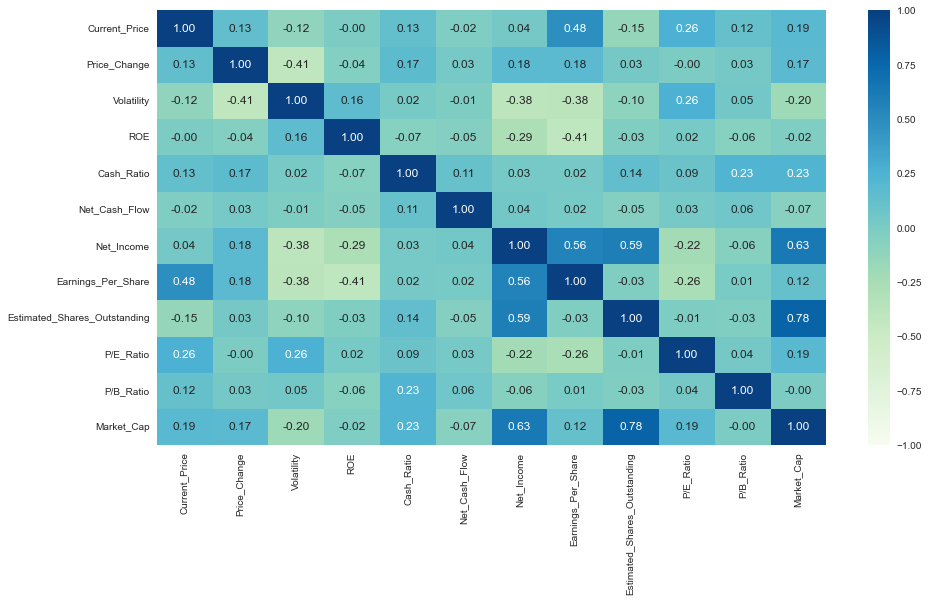

In [21]:
# plotting correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="GnBu")
sns.set(font_scale = 1)
plt.show()

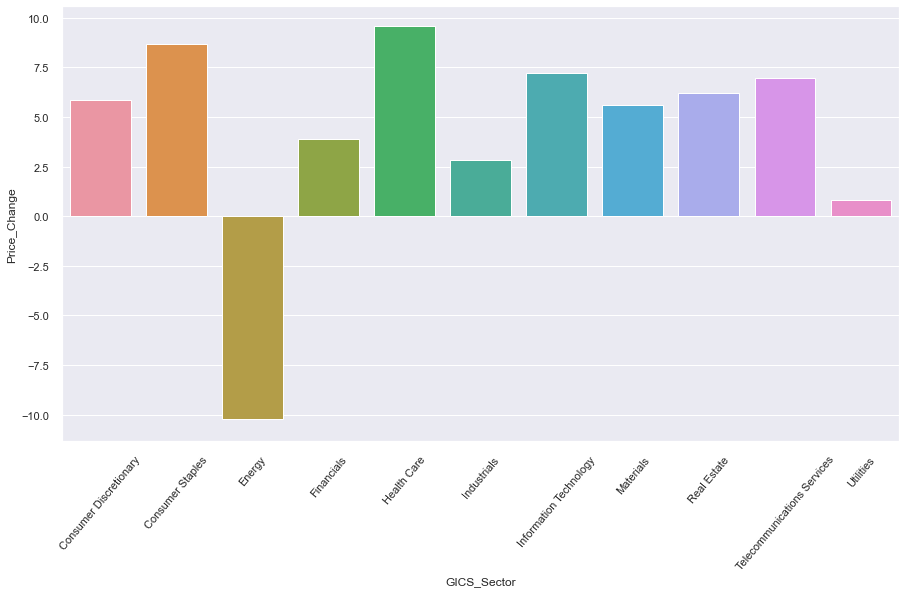

In [22]:
# checking the variation of price change across economic sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS_Sector', y='Price_Change', ci=False)
sns.set(font_scale = 1)
plt.xticks(rotation=50)
plt.show()

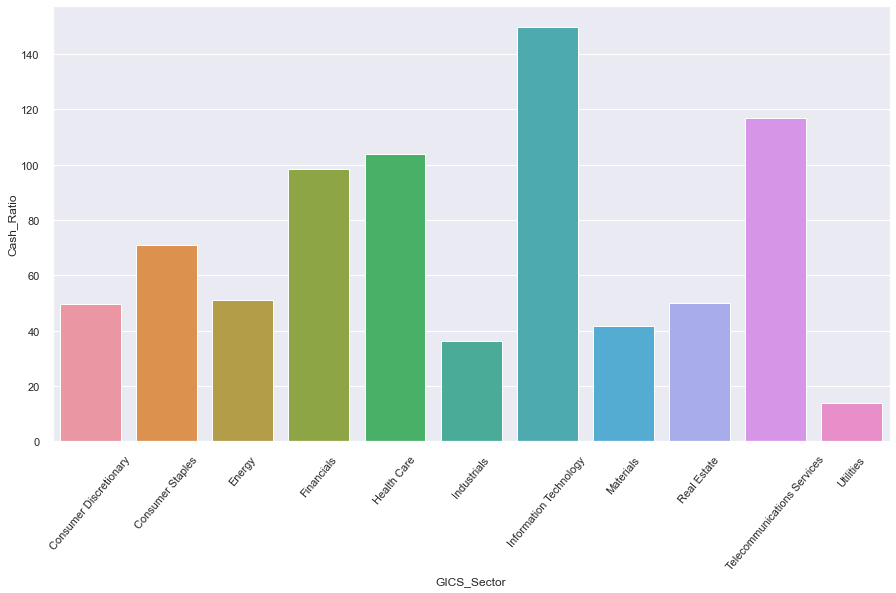

In [23]:
# checking the variation of cash ratio across economic sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS_Sector', y='Cash_Ratio', ci=False)
sns.set(font_scale = 1)
plt.xticks(rotation=50)
plt.show()

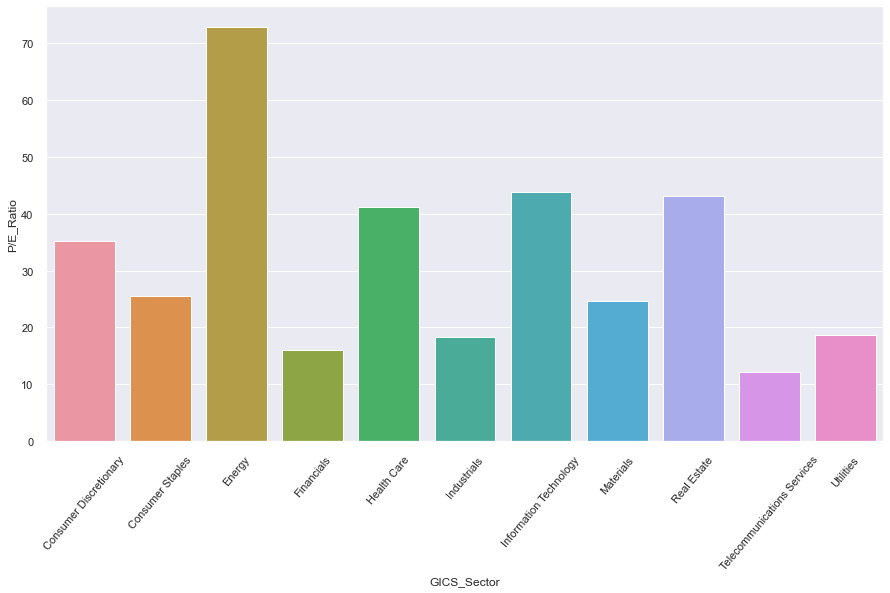

In [24]:
# checking the variation of P/E ratios across economic sector
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS_Sector', y='P/E_Ratio', ci=False)
sns.set(font_scale = 1)
plt.xticks(rotation=50)
plt.show()

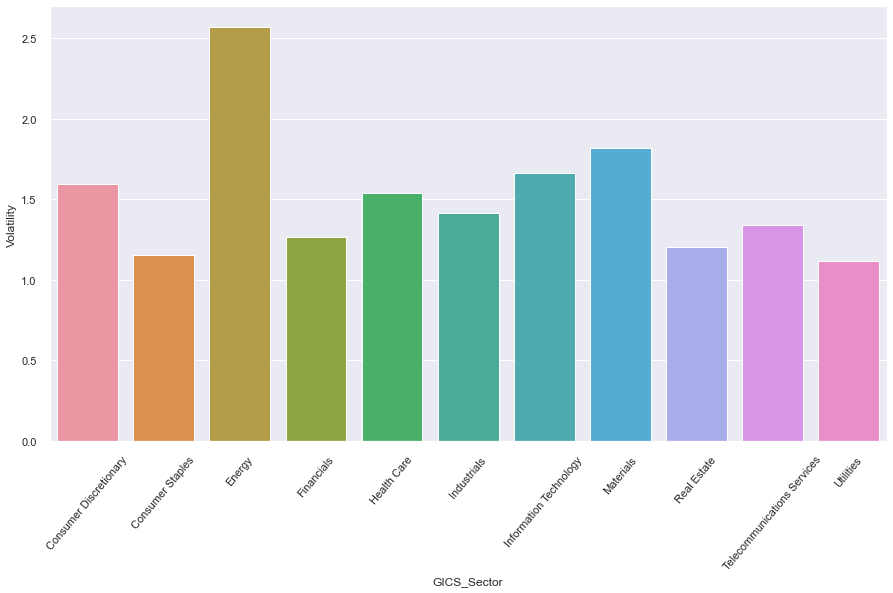

In [25]:
# checking volatility of stock prices across economic sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS_Sector', y='Volatility', ci=False)
sns.set(font_scale = 1)
plt.xticks(rotation=50)
plt.show()

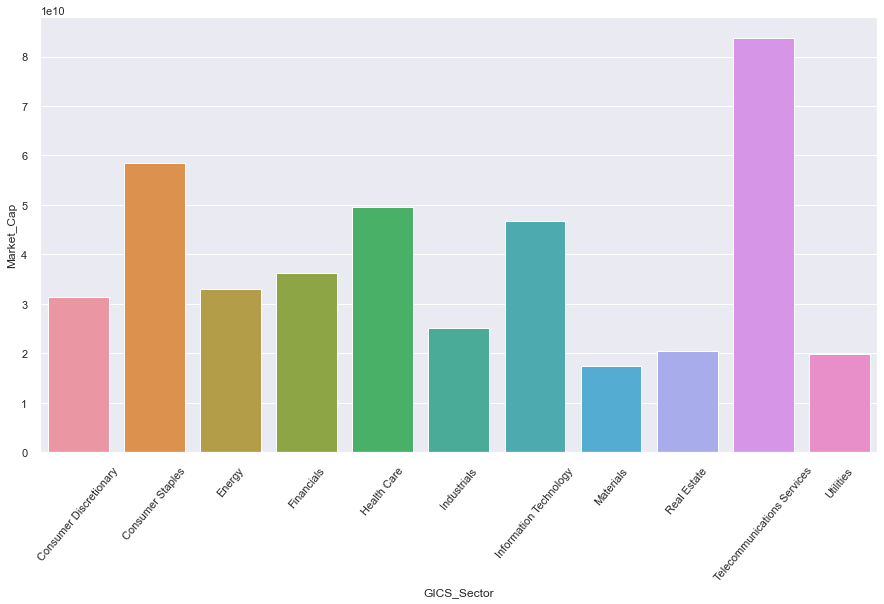

In [26]:
# checking market capitalisation across economic sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS_Sector', y='Market_Cap', ci=False)
sns.set(font_scale = 1)
plt.xticks(rotation=50)
plt.show()

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

**Answers:**
1. The distribution of stock prices are skewed to the right with a mean value of around 80 dollars per share. There are some very high outliers due to some stocks being worth more per share, and could be dependent on the type of sector.
2. The top 3 sectors having a 7% or above price increase are healthcare, consumer staples, and IT, with healthcare having the highest, at a 9% increase. The energy sector has seen around a 10% drop in price.
3. There is a high positive correlation between Net Income with Estimated Shares Outstanding, and Net Income with Earnings Per Share. Net income grows as the stock market shares increase, returning more to its shareholders. There is also a moderate positive correlation between Current Price and Earnings Per Share. This makes sense as an increase in current price should lead to more earnings.
4. The IT sector has the highest ratio of 150, followed by telecommunications services of ~115, and healthcare of ~105. The lowest being utilities with a ratio of ~15. As IT is a growing industry with new and expensive technologies advancing fast, this sector would need to have a high cash reserve to cover costs.
5. The energy sector has a very high P/E ratio above 70, compared to the lowest P/E ratio of ~10 in the telecommunication services sector. Healthcare, IT, and real estate are falling in the mid range around 40.

**Other Observations**
- The average stock price is 80.90USD and average earnings per share is 2.80USD.
- Oil and gas exploration and production is the top sub-industry which accounts for around 5%.
- The volatility in the energy sector is the highest. All other sectors fall between a 1 and 2 standard deviation for market volatility. This could suggest that there are other factors influencing the energy sector compared to normal market fluctuations across the other sectors.
- Telecommunications sector has the highest market capitalisation.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

**Dropping Columns**

In [27]:
df.iloc[:,0].value_counts()

AAL     1
NEE     1
NUE     1
NTRS    1
NSC     1
       ..
EQR     1
EQIX    1
EOG     1
EMN     1
ZTS     1
Name: Ticker_Symbol, Length: 340, dtype: int64

In [28]:
df.iloc[:,1].value_counts()

3M Company                          1
Newmont Mining Corp. (Hldg. Co.)    1
ONEOK                               1
O'Reilly Automotive                 1
Nucor Corp.                         1
                                   ..
EQT Corporation                     1
EOG Resources                       1
E*Trade                             1
Dun & Bradstreet                    1
eBay Inc.                           1
Name: Company, Length: 340, dtype: int64

In [29]:
df.drop(["Ticker_Symbol","Company"], inplace=True, axis=1)

**Outlier Detection**

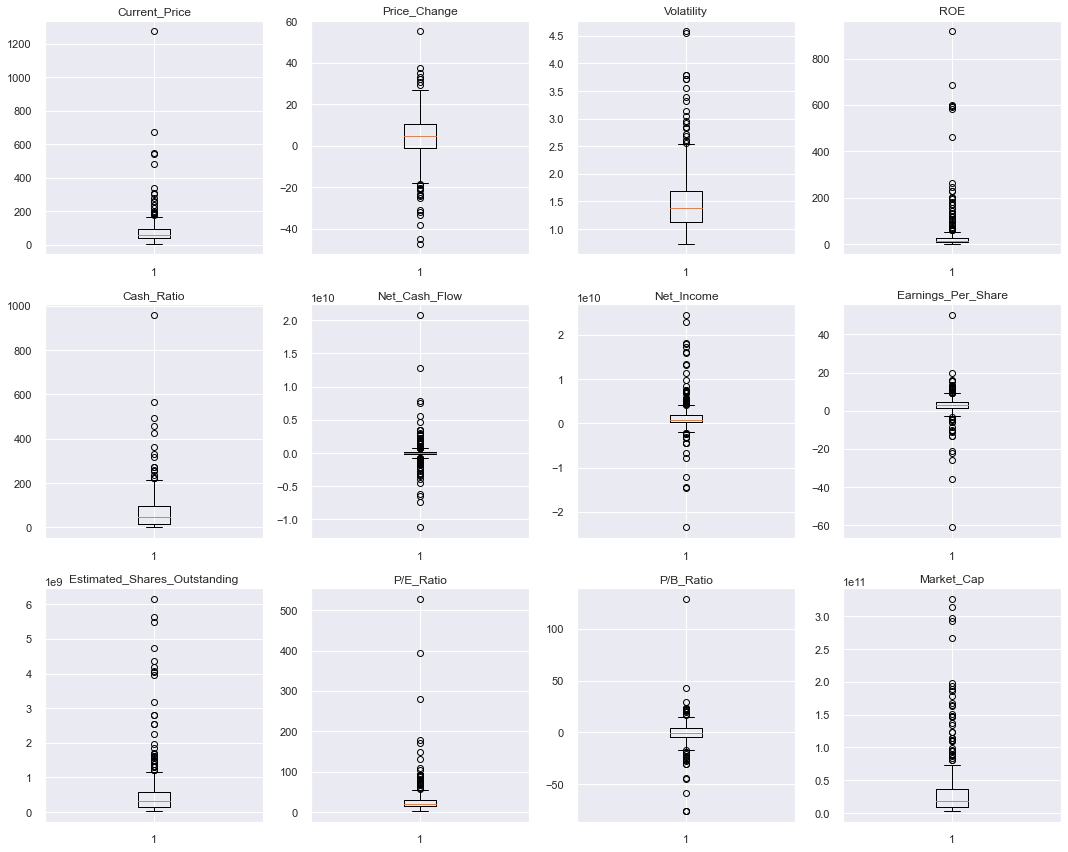

In [30]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15,12))
for i, variable in enumerate(num_cols):
  plt.subplot(3,4,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

In [31]:
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr
uw = q3 - 1.5 * iqr
100 - ((df[num_cols]<lw)|(df[num_cols]>uw)).sum()/df.shape[0]*100

Current_Price                   2.1
Price_Change                    8.5
Volatility                      1.8
ROE                             0.9
Cash_Ratio                      0.0
Net_Cash_Flow                   5.9
Net_Income                      2.4
Earnings_Per_Share              5.0
Estimated_Shares_Outstanding    0.0
P/E_Ratio                       1.8
P/B_Ratio                      10.9
Market_Cap                      0.0
dtype: float64

- Outliers will not be treated and will be kept in the dataset. The outliers account for the variation in the different variables that relates to the stock market and are relevant to the dataset.

**Scaling**

In [32]:
# variables for clustering
num_col = df.select_dtypes(include=np.number).columns.tolist()
num_col

['Current_Price',
 'Price_Change',
 'Volatility',
 'ROE',
 'Cash_Ratio',
 'Net_Cash_Flow',
 'Net_Income',
 'Earnings_Per_Share',
 'Estimated_Shares_Outstanding',
 'P/E_Ratio',
 'P/B_Ratio',
 'Market_Cap']

In [33]:
# scaling the data
scaler = StandardScaler()
subset = df[num_col].copy()
df_scaled = scaler.fit_transform(subset)

In [34]:
# creating a dataframe of the scaled columns
df_scaled = pd.DataFrame(df_scaled, columns=subset.columns)
df_scaled.head()

Current_Price  Price_Change  Volatility  ROE  Cash_Ratio  Net_Cash_Flow  \
0           -0.4           0.5         0.3  1.0        -0.2           -0.3   
1           -0.2           0.4         1.1  0.9         0.1           -0.0   
2           -0.4           0.6        -0.4 -0.2        -0.0            0.5   
3            0.1           0.8        -0.3 -0.3         1.2           -0.2   
4           -0.3          -0.5         0.3 -0.3         2.2            0.1   

   Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding  P/E_Ratio  \
0         1.6                 1.3                           0.1       -0.7   
1         0.9                 0.1                           1.3       -0.3   
2         0.7                 0.0                           1.1       -0.4   
3        -0.2                -0.2                          -0.1        0.9   
4        -0.2                -0.4                           2.0        3.3   

   P/B_Ratio  Market_Cap  
0       -0.5        -0.1  
1       -0.5         1.3  
2        0.1         0.7  
3        0.4         0.3  
4        0.2         1.8

## EDA

- It is a good idea to explore the data once again after manipulating it.

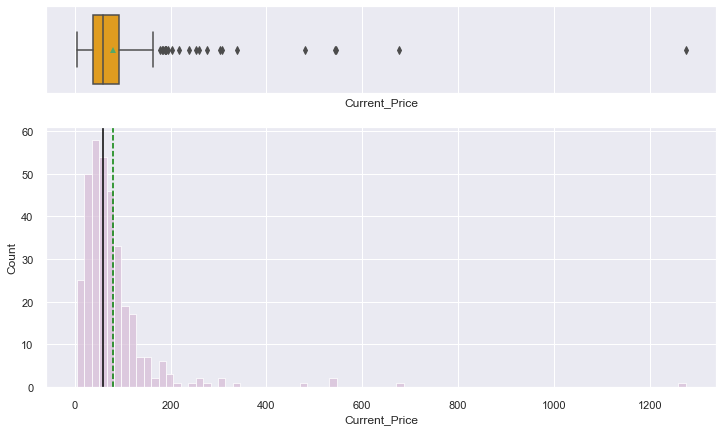

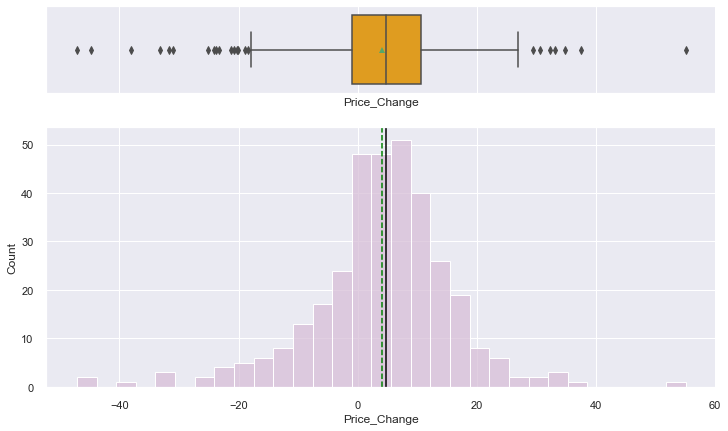

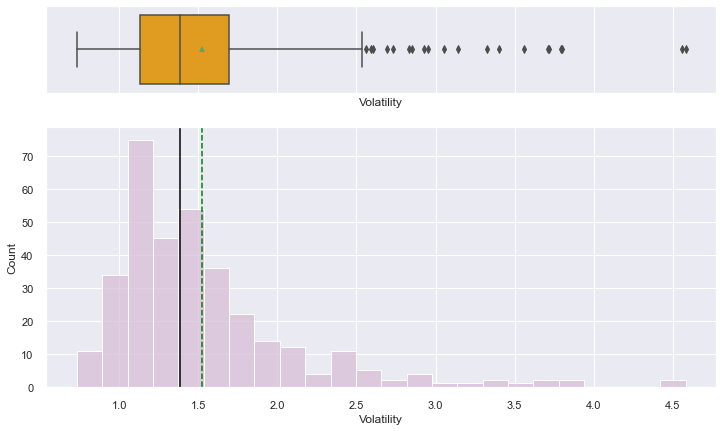

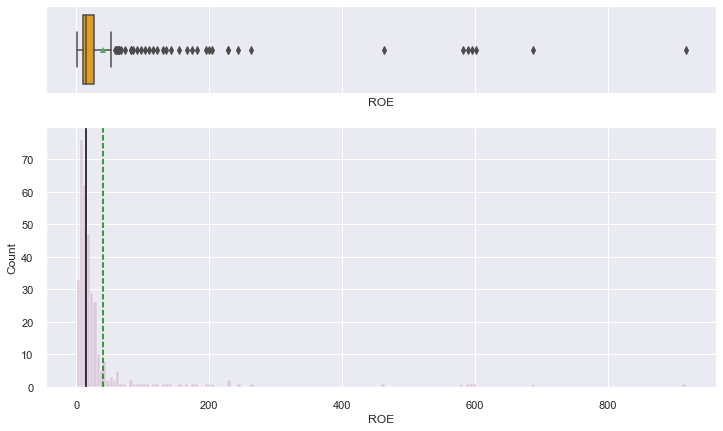

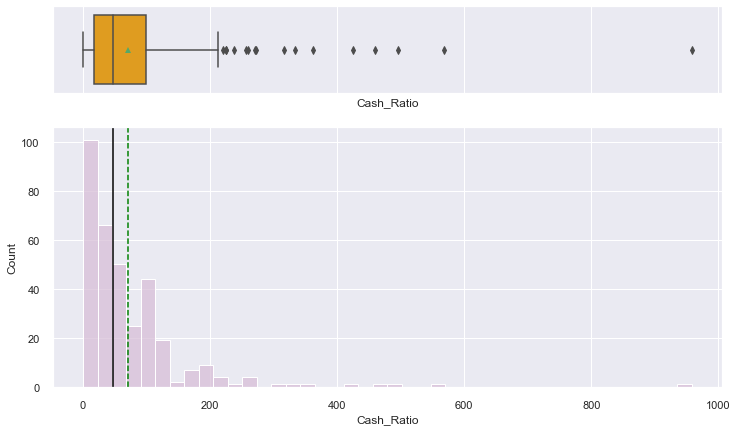

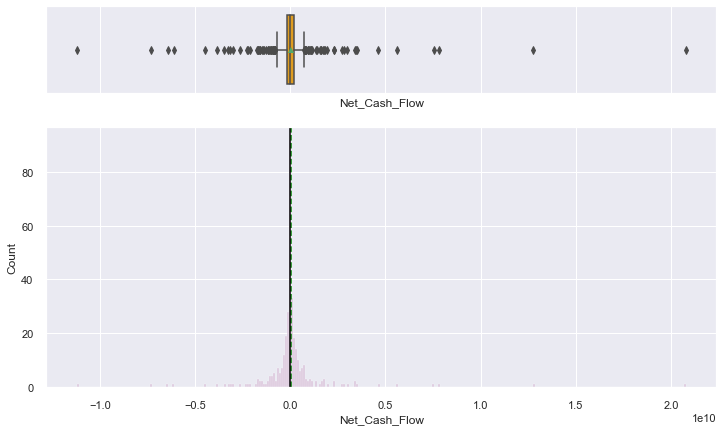

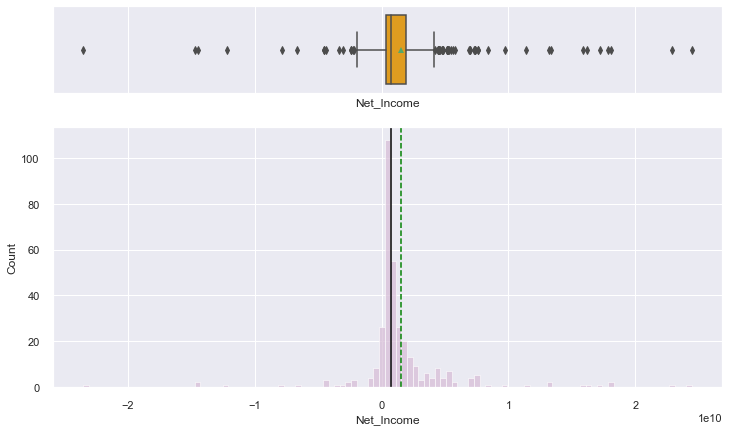

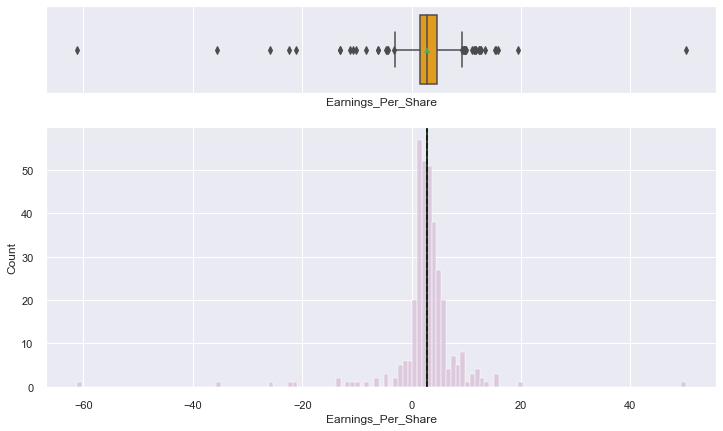

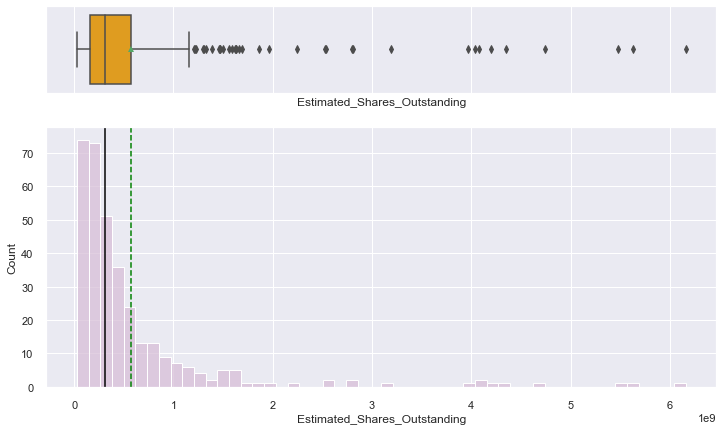

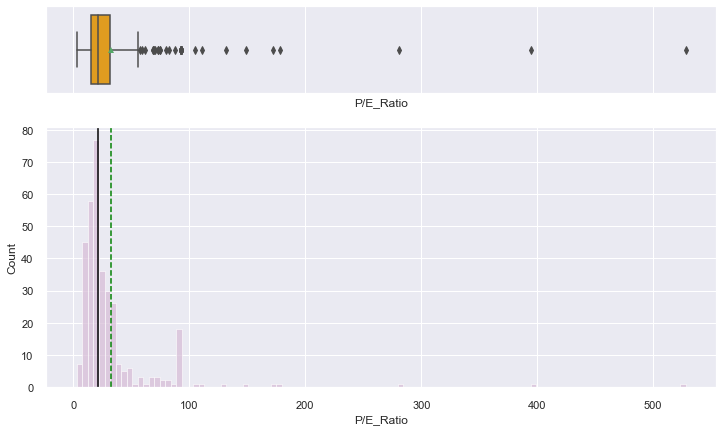

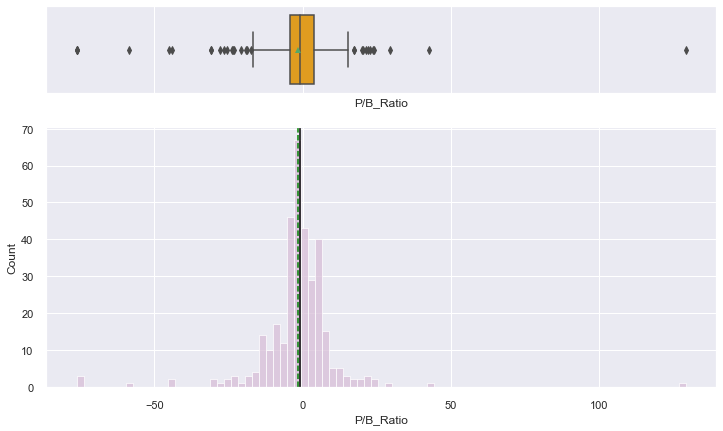

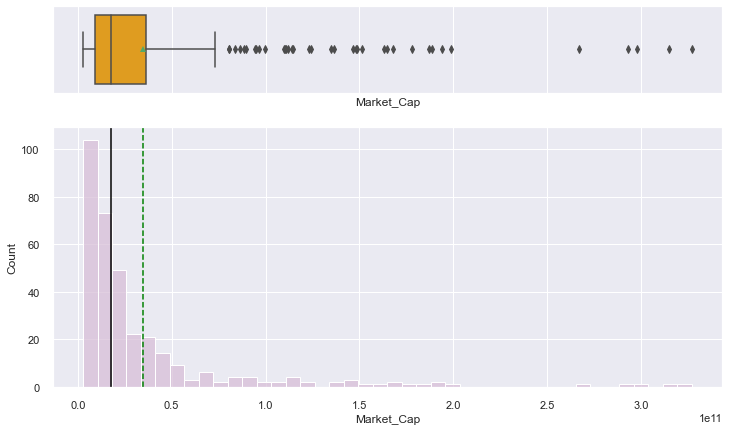

In [35]:
# plotting numerical data
num_cols = df.describe(include=["int64", "float64"])
for col in num_cols:
    histogram_boxplot(df, col)

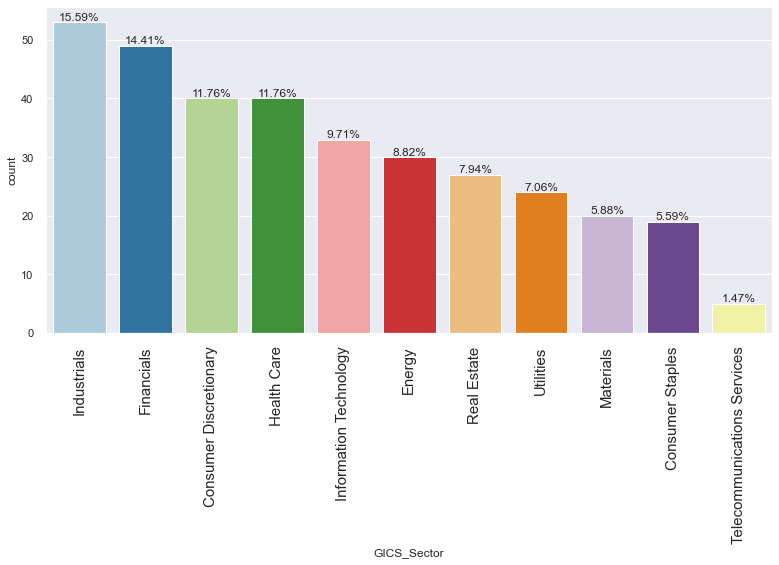

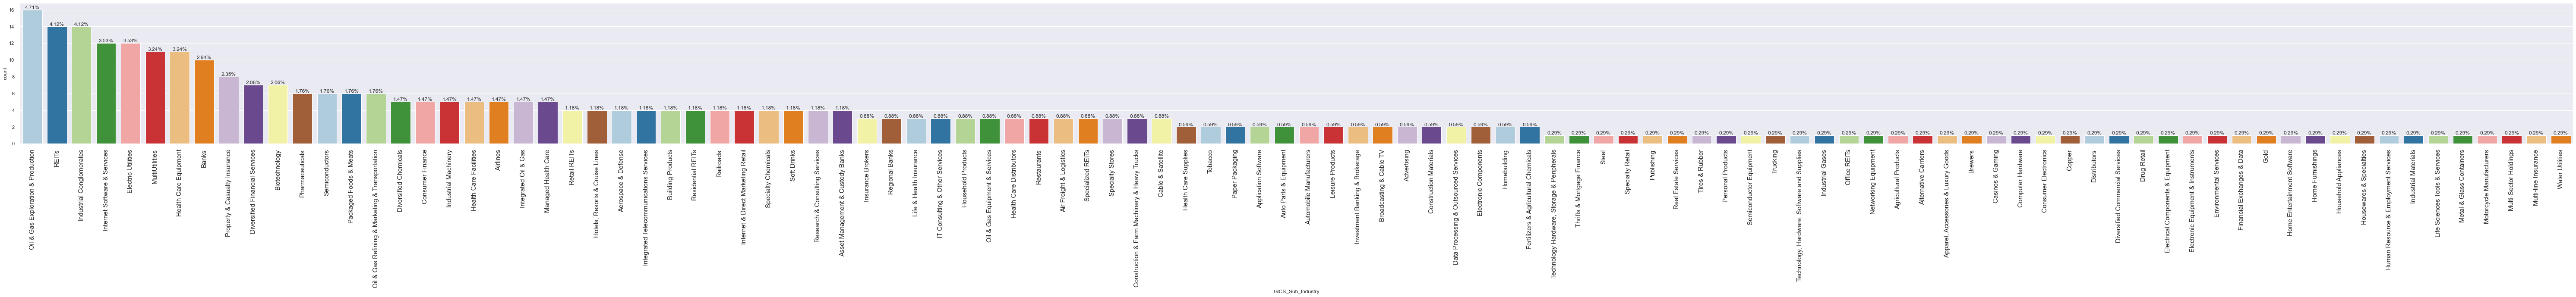

In [36]:
# plotting categorical data
cat_cols = df.describe(include=["category"]).columns
for col in cat_cols:
    labeled_barplot(df, col, perc=True)

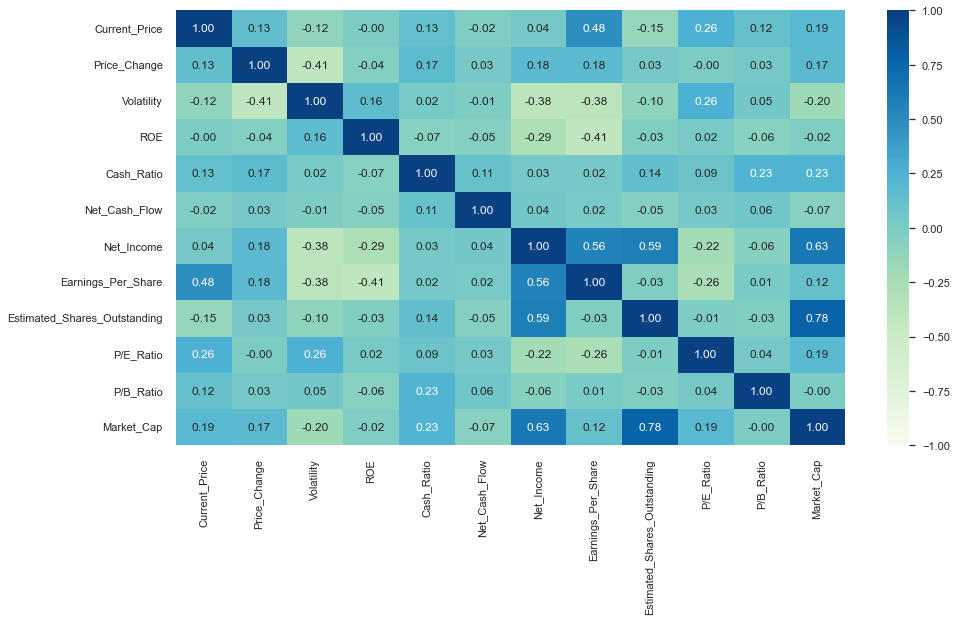

In [37]:
# plotting correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="GnBu")
sns.set(font_scale = 1)
plt.show()

## K-means Clustering

**Elbow Plot**

In [38]:
# copying data for K-means clustering
KM_df = df_scaled.copy()

Number of Clusters: 1 	Average Distortion: 2.6646753531136738
Number of Clusters: 2 	Average Distortion: 2.4996649595801226
Number of Clusters: 3 	Average Distortion: 2.3502624069134233
Number of Clusters: 4 	Average Distortion: 2.261147056175026
Number of Clusters: 5 	Average Distortion: 2.2186675586977684
Number of Clusters: 6 	Average Distortion: 2.1488499470433027
Number of Clusters: 7 	Average Distortion: 2.104092782178702
Number of Clusters: 8 	Average Distortion: 2.0551261102660225
Number of Clusters: 9 	Average Distortion: 1.9673521569957058
Number of Clusters: 10 	Average Distortion: 1.9455097850754282


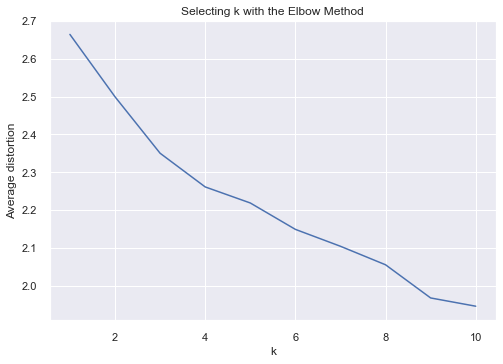

In [39]:
# calculating and printing the average distortion score for 10 clusters
clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(KM_df)
    prediction = model.predict(KM_df)
    distortion = (
        sum(
            np.min(cdist(KM_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / KM_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

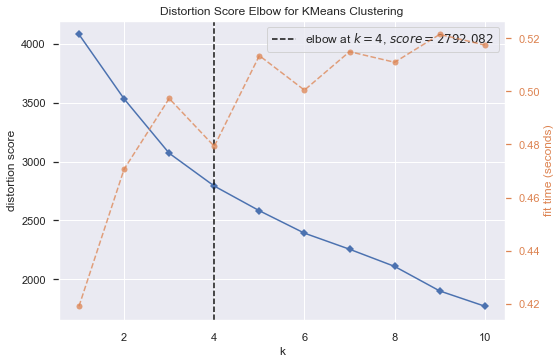

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
# plotting the elbow chart to visualise distortion score for each cluster
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 11), timings=True)
visualizer.fit(KM_df)
visualizer.show()

**Silhouette Scores**

For n_clusters = 2, the silhouette score is 0.4549941077089958)
For n_clusters = 3, the silhouette score is 0.44347768182377145)
For n_clusters = 4, the silhouette score is 0.4394884710803987)
For n_clusters = 5, the silhouette score is 0.34656724811679385)
For n_clusters = 6, the silhouette score is 0.334147608298283)
For n_clusters = 7, the silhouette score is 0.34943661845281976)
For n_clusters = 8, the silhouette score is 0.11967394688992657)
For n_clusters = 9, the silhouette score is 0.2879218968012901)
For n_clusters = 10, the silhouette score is 0.2942862885505188)


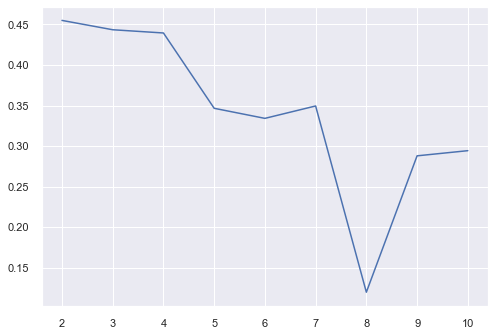

In [41]:
# calculating the silhouette scores for clusters 2 - 10
sil_score = []
cluster_list = list(range(2, 11))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((df_scaled))
    score = silhouette_score(KM_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

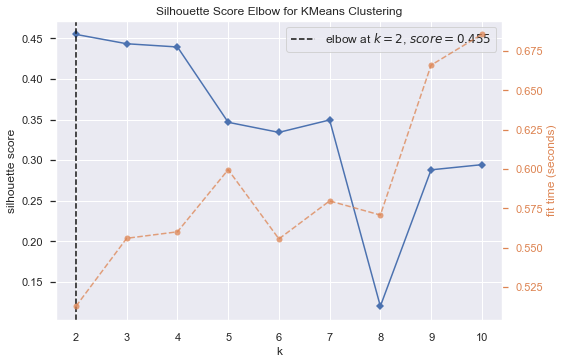

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [42]:
# plotting the elbow chart to visualise silhouette score for each cluster
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=True)
visualizer.fit(KM_df)
visualizer.show()

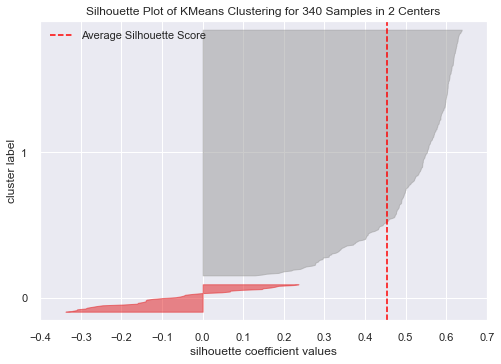

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(KM_df)
visualizer.show()

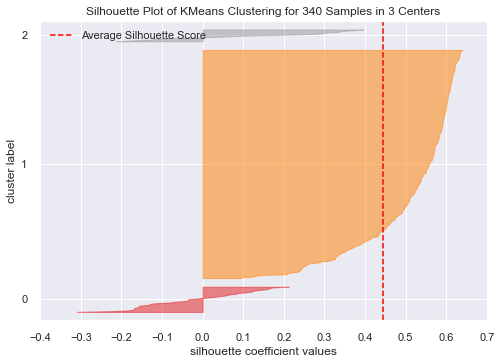

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(KM_df)
visualizer.show()

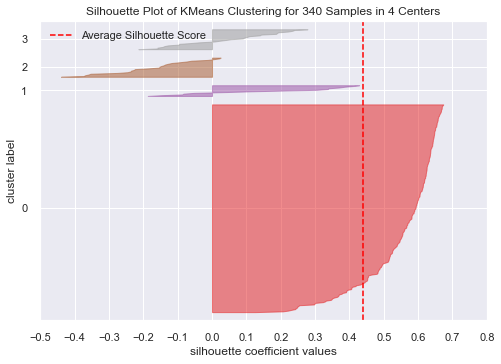

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(KM_df)
visualizer.show()

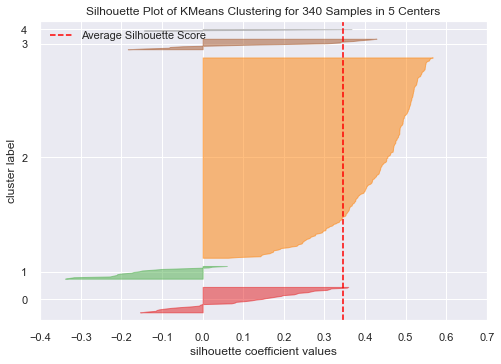

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(KM_df)
visualizer.show()

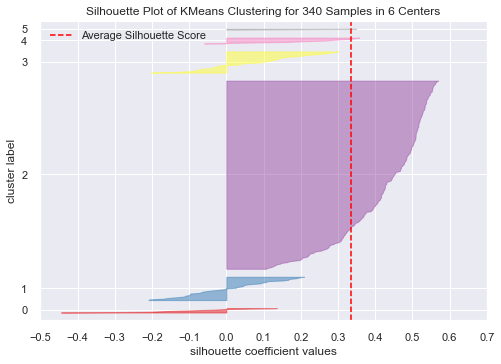

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(KM_df)
visualizer.show()

- according to the elbow curve and silhouette plots, 4 clusters seems to be the optimal number of clusters to use

**Final Model**

In [48]:
# creating final model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(KM_df)

KMeans(n_clusters=4, random_state=1)

In [49]:
# creating a copy of the original data
df1 = data.copy()

# adding kmeans cluster labels to the original and scaled dataframes
KM_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

**Cluster Profiling**

In [50]:
km_cluster_profile = df1.groupby("KM_segments").mean()

In [51]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Company"].count().values
)

In [52]:
# displaying cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(color="pink", axis=0)

In [53]:
# code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print(
        "The",
        df1[df1["KM_segments"] == cl]["Company"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df1[df1["KM_segments"] == cl]["Company"].unique())
    print("-" * 100, "\n")

The 272 companies in cluster 0 are:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 272
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']
---------------------------------------------------------------------------------------------------- 

The 26 companies in cluster 2 are:
['Analog Devices, Inc.', 'Alliance Data Systems', 'Alexion Pharmaceuticals', 'Amgen Inc', 'Amazon.com Inc', ..., 'TripAdvisor', 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']
Length: 26
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']
-------------------------------------------------------------------------------------

In [54]:
# looking at the no. of companies per sector in each cluster
df1.groupby(["KM_segments", "GICS_Sector"])['Company'].count()

KM_segments  GICS_Sector                
0            Consumer Discretionary         32
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    28
             Industrials                    52
             Information Technology         22
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          2
             Consumer Staples                1
             Energy                          2
             Financials                      3
             Health Care                     3
             Industrials                     0
             Information Technology          2
             Materials                       0
             Real Estate                     0
             Teleco

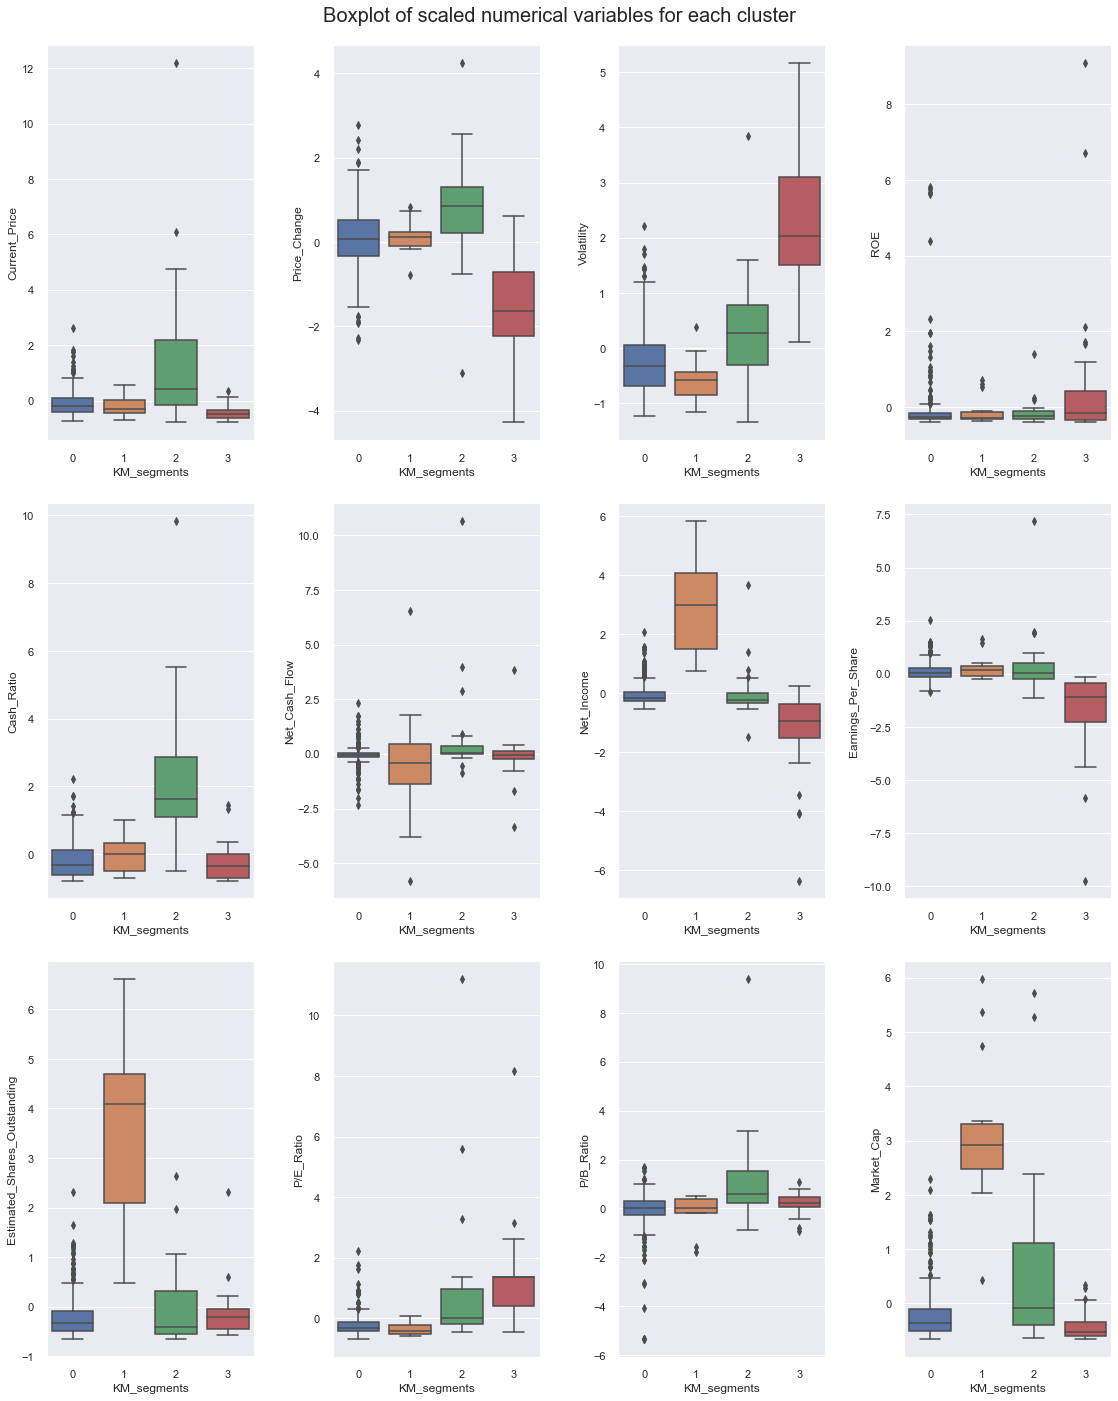

In [55]:
plt.figure(figsize=(16, 20))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=KM_df, x=KM_df["KM_segments"], y=variable)

plt.tight_layout(pad=2.0)

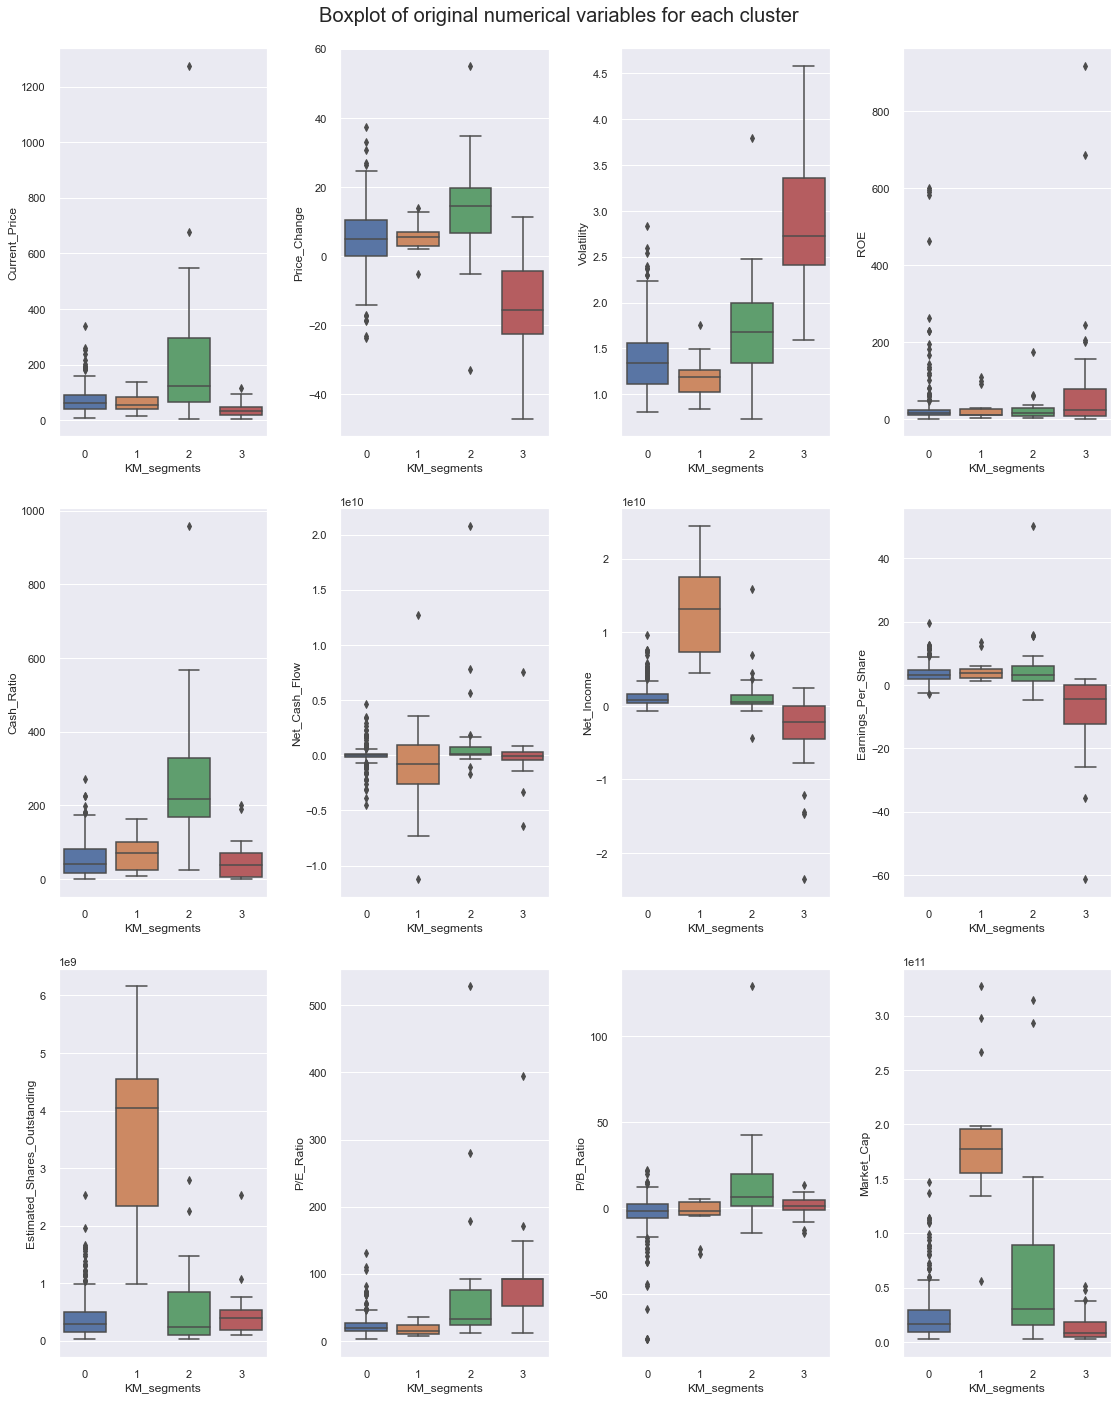

In [56]:
plt.figure(figsize=(16, 20))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x=df1["KM_segments"], y=variable)

plt.tight_layout(pad=2.0)

<AxesSubplot:xlabel='KM_segments'>

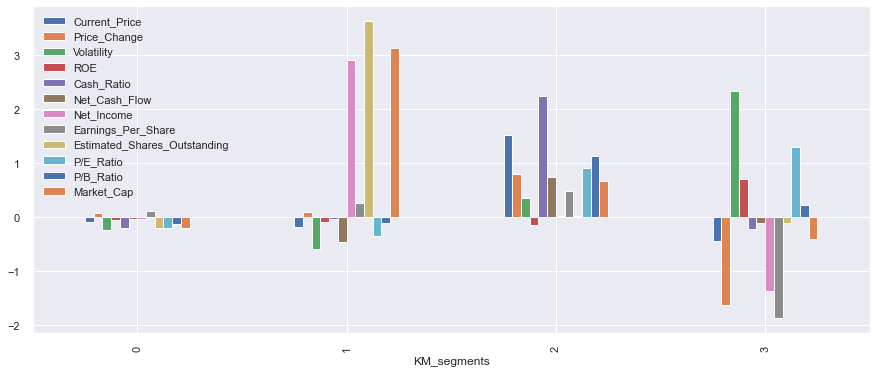

In [57]:
KM_df.groupby("KM_segments").mean().plot.bar(figsize=(15, 6))

**Inights for K-Means Clustering**

- **Cluster 0:**
    - is the largest cluster out of all 4 cluster groups
    - it contains stocks from across all types of sectors, with the highest being the industrials sector which  accounts for around 19% of stocks in this cluster, followed by financials sector
    - has the least estimated shares outstanding and P/B ratio
    - low P/B ratio could be a signal to investors that a stock may be undervalued
    - stocks in this cluster are in the mid range and don't seem to be doing either extremely well or extremely bad, they seem to have low values across all variables

- **Cluster 1:**
    - has the highest net income and estimated shares outstanding
    - has the lowest volatility, net cash flow, and P/E ratio
    - stocks in this cluster are doing the best in revenue and will have a high market cap, however, it has negative net cash flow suggesting these companies are also losing money
    - low P/E ratio suggests these stocks are a better value and benefits both the business and potential investors
    - the companies vary across the different sectors, there are no definitive sectors that covers this cluster

- **Cluster 2:**
    - contains mostly stocks from the healthcare, consumer discretionary, and IT sectors
    - has the highest current price of around 230.00USD, price change, cash ratio, net cash flow, earnings per share, and P/B ratio
    - a high P/B ratio suggests that the stock price is trading at a premium to the company's book value, so stocks in this cluster may not have more potential for growth in future years and are considered overvalued
    - more than 50% of market volatility have a standard deviation bewteen 2.2 and 3.5
    - has the lowest ROE suggesting the company earns relatively little compared to its shareholder's equity
  

- **Cluster 3:**
    - mainly has companies from the energy sector
    - has the highest volatility, ROE, and P/E ratio
    - having an extremely high P/E ratio and ROE value in this group shows risk, meaning investors are paying much more per share than the company is earning, and probably because of a small equity account compared to net income
    - has the lowest current price, price change, cash ratio, net income, and earnings per share
    - this cluster seems to have negative earnings per share and an average price change between -10 to -25%, meaning people will be losing money on these stocks

## Hierarchical Clustering

**Cophenetic Correlation**

In [58]:
# copying data for hierarchical clustering
HC_df = df_scaled.copy()

In [59]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(HC_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(HC_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.926041310873763.
Cophenetic correlation for Euclidean distance and complete linkage is 0.791939135543019.
Cophenetic correlation for Euclidean distance and average linkage is 0.9530438417694962.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8501715048081158.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9001897959838955.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8054360315255696.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9356415265839566.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9091809731425127.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9225631966653518.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.8184404520199318.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9326944559625352.
Cophenetic corr

In [60]:
# printing distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9530438417694962, which is obtained with Euclidean distance and average linkage.


In [61]:
# explore other linkage methods with Euclidean distance only
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(HC_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(HC_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.926041310873763.
Cophenetic correlation for complete linkage is 0.791939135543019.
Cophenetic correlation for average linkage is 0.9530438417694962.
Cophenetic correlation for centroid linkage is 0.9526962463883317.
Cophenetic correlation for ward linkage is 0.6998486561901136.
Cophenetic correlation for weighted linkage is 0.8501715048081158.


In [62]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9530438417694962, which is obtained with average linkage.


**Dendrograms**

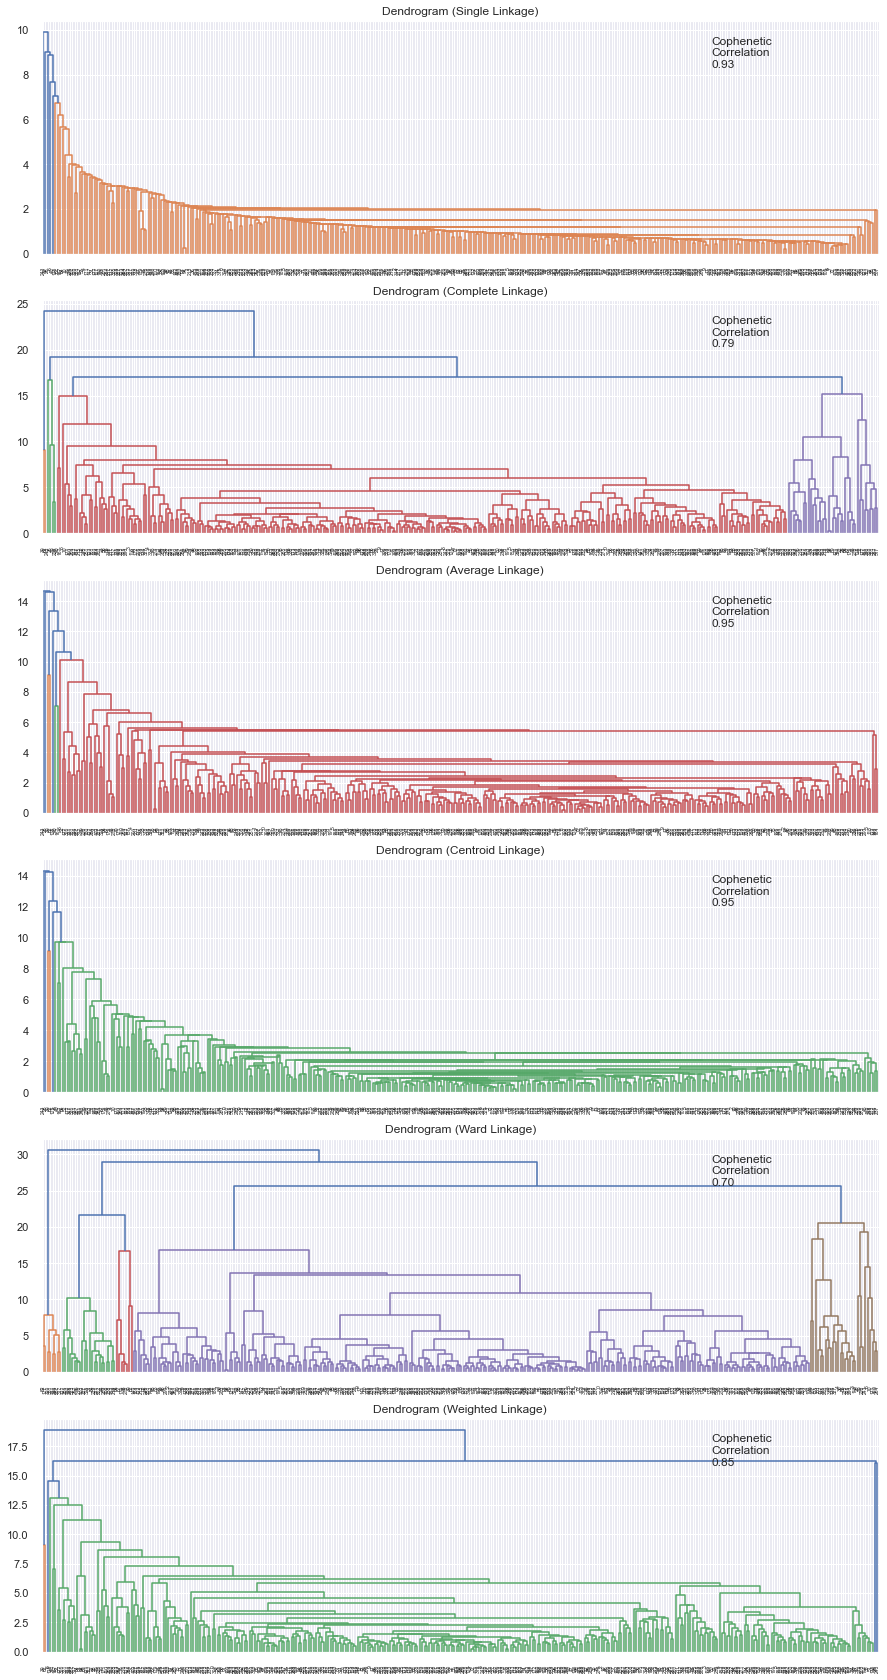

In [63]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# enumerating through the list of linkage methods above
# plotting the dendrogram and calculating cophenetic correlation for each linkage method
for i, method in enumerate(linkage_methods):
    Z = linkage(HC_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(HC_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [64]:
# creating a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                     0.7
1  complete                     0.8
5  weighted                     0.9
0    single                     0.9
3  centroid                     1.0
2   average                     1.0

- average and centroid linkage have the highest cophenetic coeffient value, however, the ward linkage with euclidean distance seems to show the best fit as the dendrogram shows distinct and separate clusters
- 5 appears to be the appropriate number of clusters from the dendrogram for ward linkage

**Final Model**

In [65]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(HC_df)

AgglomerativeClustering(n_clusters=5)

In [66]:
# creating a copy of the original data
df2 = data.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
HC_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

**Cluster Profiling**

In [67]:
hc_cluster_profile = df2.groupby("HC_Clusters").mean()

In [68]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_Clusters")["Company"].count().values
)

In [69]:
# displaying cluster profiles
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(color="pink", axis=0)

In [70]:
# printing the companies in each cluster
for cl in df2["HC_Clusters"].unique():
    print(
        "The",
        df2[df2["HC_Clusters"] == cl]["Company"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df2[df2["HC_Clusters"] == cl]["Company"].unique())
    print("-" * 100, "\n")

The 275 companies in cluster 1 are:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Archer-Daniels-Midland Co', 'Ameren Corp', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 275
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']
---------------------------------------------------------------------------------------------------- 

The 28 companies in cluster 0 are:
['Adobe Systems Inc', 'Analog Devices, Inc.', 'Alliance Data Systems', 'Alexion Pharmaceuticals', 'Amgen Inc', ..., 'TripAdvisor', 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']
Length: 28
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']
----------------------------------------------------------------------------------------

In [71]:
# looking at the no. of companies per sector in each cluster
df2.groupby(["HC_Clusters", "GICS_Sector"])['Company'].count()

HC_Clusters  GICS_Sector                
0            Consumer Discretionary          6
             Consumer Staples                1
             Energy                          0
             Financials                      1
             Health Care                     8
             Industrials                     0
             Information Technology          9
             Materials                       1
             Real Estate                     1
             Telecommunications Services     1
             Utilities                       0
1            Consumer Discretionary         33
             Consumer Staples               15
             Energy                          7
             Financials                     44
             Health Care                    31
             Industrials                    52
             Information Technology         23
             Materials                      18
             Real Estate                    26
             Teleco

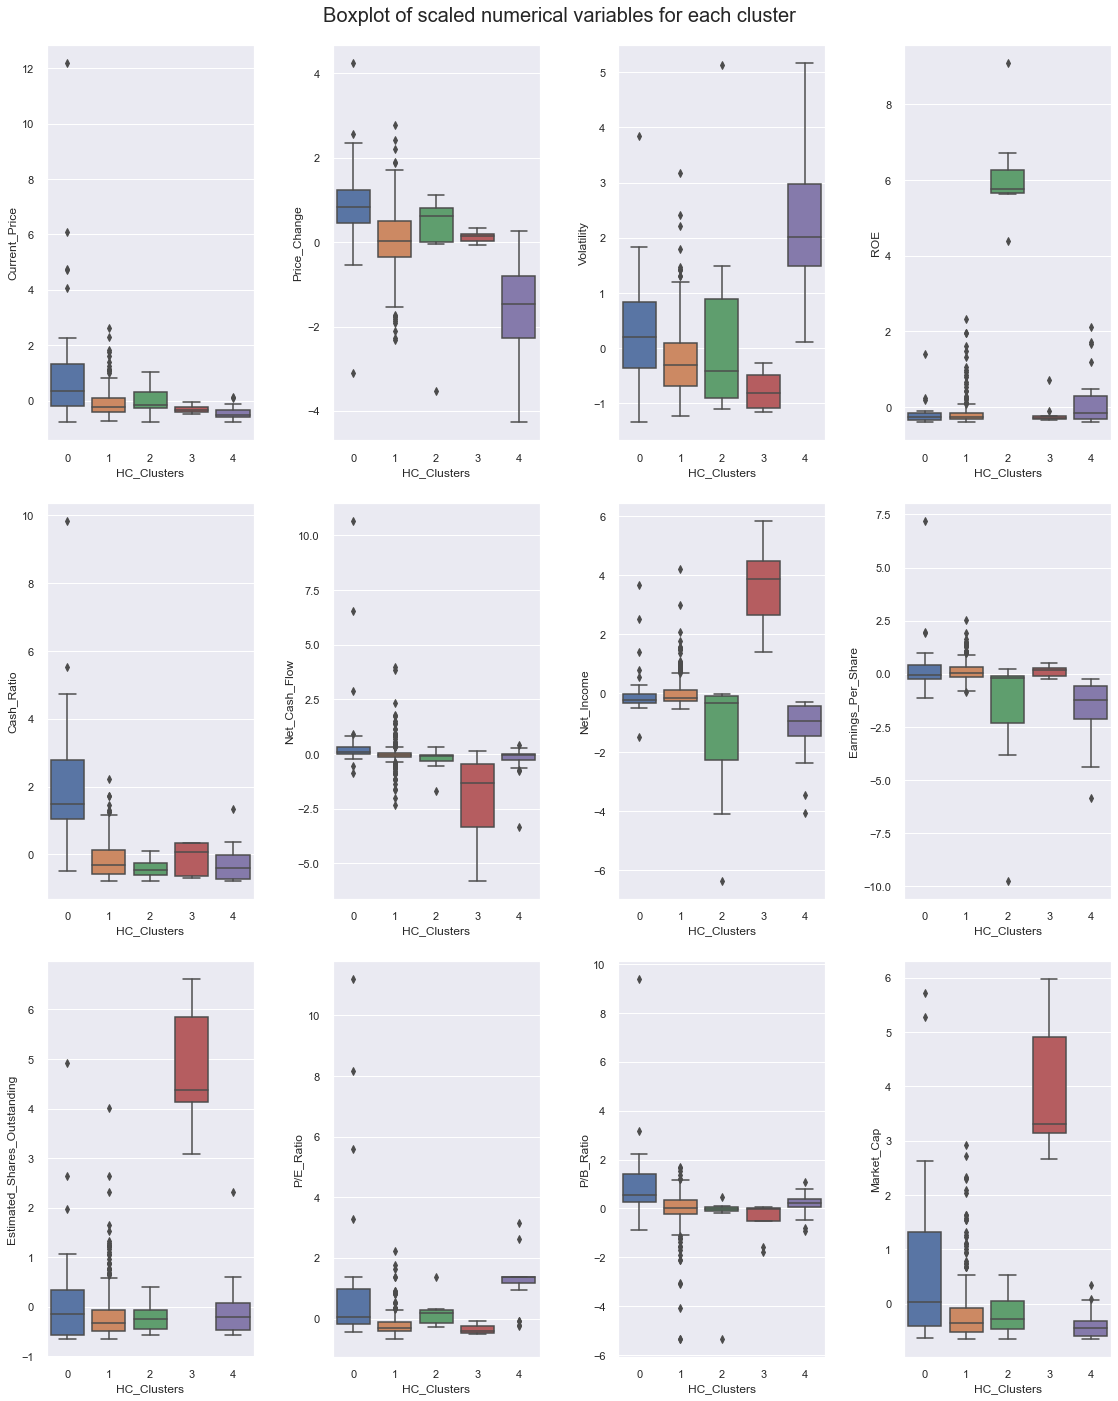

In [72]:
plt.figure(figsize=(16, 20))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=HC_df, x=HC_df["HC_Clusters"], y=variable)

plt.tight_layout(pad=2.0)

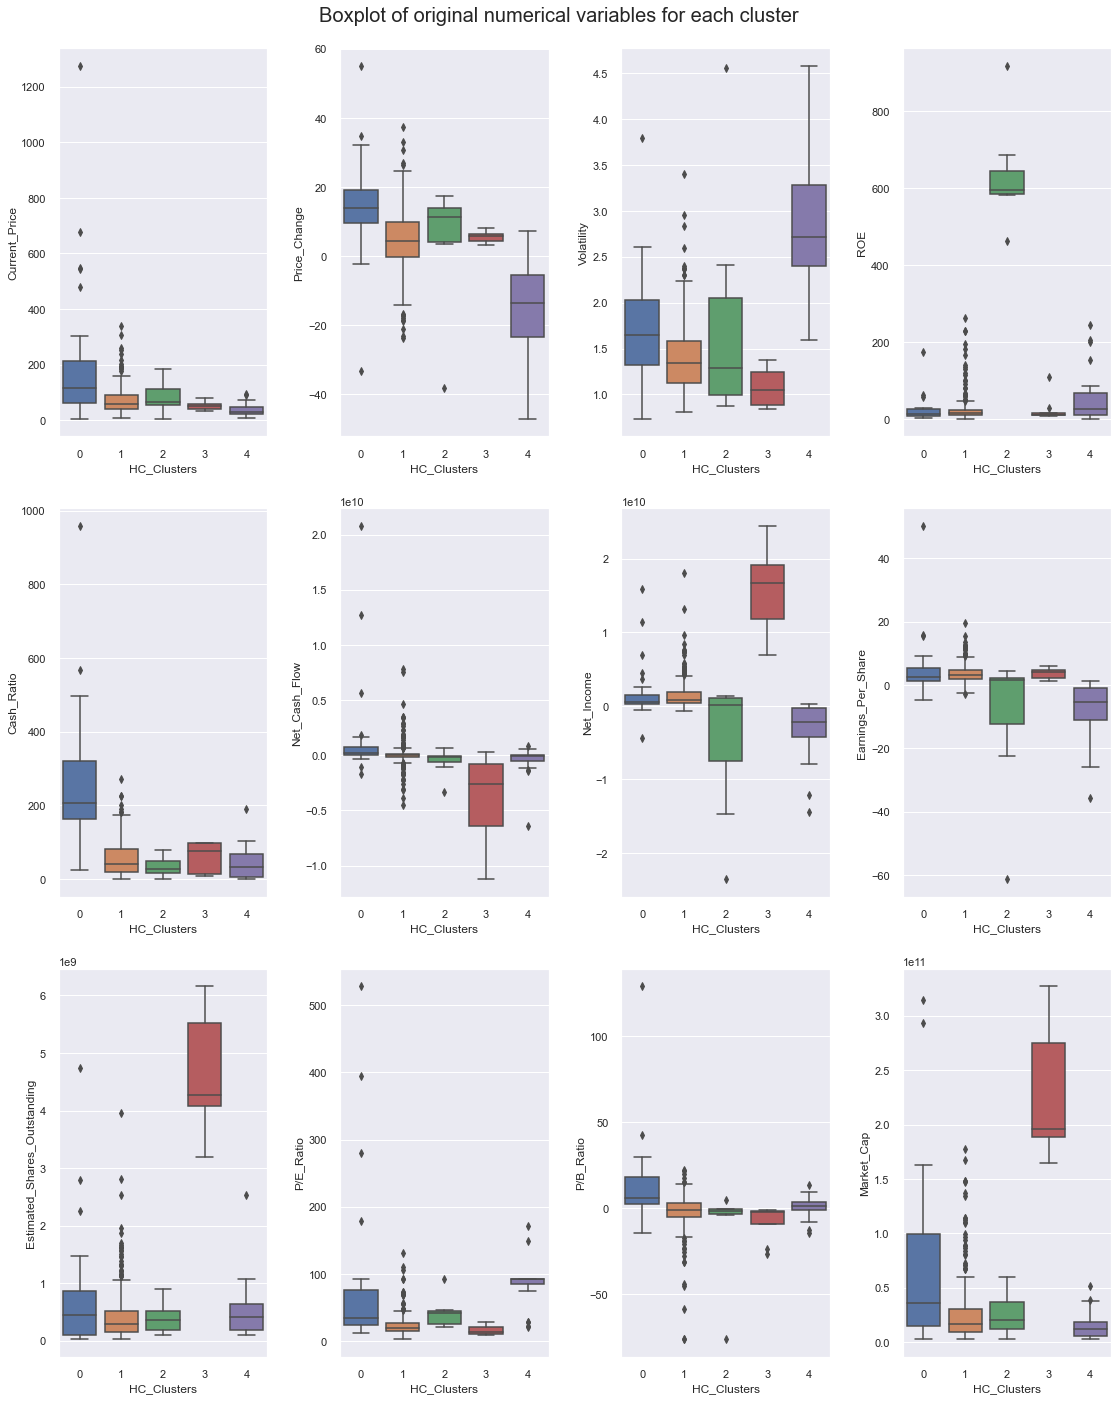

In [73]:
plt.figure(figsize=(16, 20))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x=df2["HC_Clusters"], y=variable)

plt.tight_layout(pad=2.0)

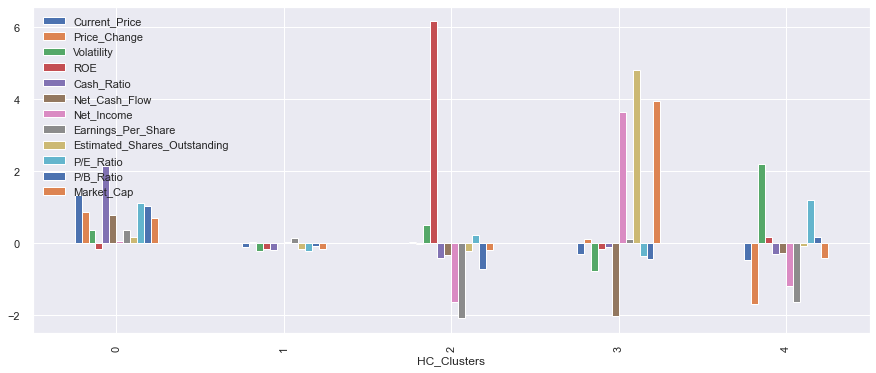

In [74]:
HC_df.groupby("HC_Clusters").mean().plot.bar(figsize=(15, 6))
plt.legend(loc=2)

**Inights for Hierarchical Clustering**

- **Cluster 0:**
    - IT, healthcare, and consumer discretionary are the main three sectors in this cluster
    - has the highest current price, price change, cash ratio, net cash flow, earnings per share, and P/B ratio
    - it has the lowest ROE, meaning companies are earning less compared to shareholders equity

- **Cluster 1:**
    - is the largest cluster out of all 5 cluster groups and contains stocks from across all types of sectors
    - stocks in this cluster are in the mid range and don't seem to be doing either extremely well or extremely bad
    - they seem to have low values across all variables

- **Cluster 2:**
    - has no main economic sectors
    - is the smallest cluster group
    - has the highest ROE, but lowest cash ratio, net income, earnings per share, estimated shares outstanding, and P/B ratio
    - the extremely high ROE and very low financial indicators above suggests these are high risk stocks

- **Cluster 3:**
    - has the highest net income and estimated shares outstanding
    - has the lowest volatility, net cash flow and P/E ratio
    - stocks in this cluster are doing the best in revenue and will have a high market cap, however, it has negative net cash flow suggesting these companies are also losing money
    - low P/E ratio suggests these stocks are a better value and benefits both the business and potential investors

- **Cluster 4:**
    - mainly has companies from the energy sector
    - has the highest volatility and P/E ratio, meaning investors are paying much more per share than the company is earning
    - the median volatility is between 2.5 and 3 standard deviations
    - has the lowest current price and price change


## K-means vs Hierarchical Clustering

- Which clustering technique took less time for execution?
    - both techniques seemed to execute particularly fast
- Which clustering technique gave you more distinct clusters, or are they the same?
    - both techniques appeared to split the data into distinct clusters, with hierarchical clustering giving one more cluster than k-means clustering
- How many observations are there in the similar clusters of both algorithms?
    - the biggest cluster in k-means gave 272 companies as opposed to 275 companies in the biggest cluster in hierachical clustering
    - the second biggest k-means cluster gave 27 companies compared to 28 in hierachical
    - both techniques have produced similar observations amoung each size comparative cluster
- How many clusters are obtained as the appropriate number of clusters from both algorithms?
    - k-means clustering gave 4 clusters compared to 5 clusters in hierarchical clustering


- Both techniques gave similar variable values for the following k-means to hierarchical clusters respectively
    - cluster 0 and cluster 1
    - cluster 1 and cluster 3
    - cluster 2 and cluster 0
    - cluster 3 and cluster 2
    - cluster 3 and cluster 4

- Cluster 2 and 4 in hierachical clustering show similarities in each of the variables to an extent, where in k-means they have grouped these two clusters as one (cluster 3)

- Overall, from my observations and comparisons, I would go with K-Means clustering as it optimises grouping the clusters slightly better compared to hierarchical clustering, even though they are similar.

## Actionable Insights and Recommendations

- Cluster 0 consists of undervalued stocks that may be safer to invest in as they still have room to grow, are not doing extremely good or bad, and are probably influenced by general market trends and fluctuations.
- Cluster 1 consists of larger and developed companies due to the high market capitalisation and low volatility, also suggesting these are more stable stocks in the market.
- Cluster 2 contains mostly stocks from the healthcare, consumer discretionary, and IT sectors. Stocks in this cluster are trading at a premium having a high price of 230.00USD. These stocks could be overvalued and have no potential for future growth.
- Cluster 3 predominantly covers companies in the energy sector, where there is high market volatility, P/E ratio and ROE, showing that this is a higher risk investment. High volatility means big gains and big losses. From the past 13 weeks, this cluster is in a current loss.

- It is recommended that before one invests, they should:
    - consider what level of risk they want to take
    - how much they are willing to invest and how often
    - do research into the companies they want to invest in, focusing on past trends, financial records, and company actions
    - choose if they prefer smaller companies and startups as opposed to larger and maybe more stable stocks